In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [53]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [54]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [55]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [56]:
gold_dataset.shape

(2290, 6)

In [57]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [58]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Correlation:
1. Positive Correlation
2. Negative Correlation

In [59]:
correlation = gold_dataset.corr()

<ipython-input-59-a17bf32cf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

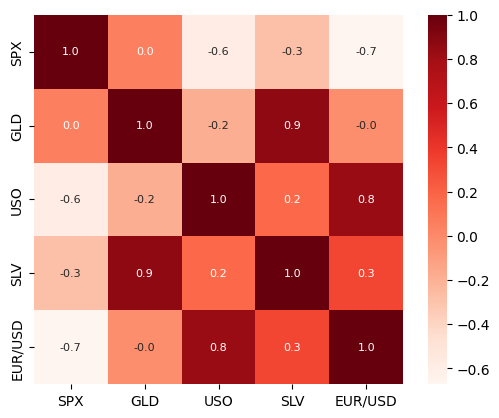

In [60]:
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f'\
            , annot = True, annot_kws = {'size': 8}, cmap = 'Reds')

In [61]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


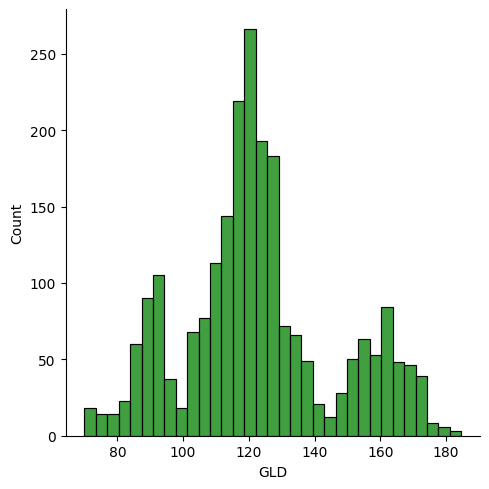

In [62]:
# Check the distribution of gold price
sns.displot(gold_dataset['GLD'], color='green')

In [63]:
X = gold_dataset.drop(['Date','GLD'], axis = 1)
Y = gold_dataset['GLD']

In [64]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [69]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [70]:
regressor = RandomForestRegressor(n_estimators = 100)


In [71]:
regressor.fit(X_train, Y_train)


RandomForestRegressor()

Model Evaluation

In [77]:
test_prediction = regressor.predict(X_test)
#R^2
error_score = metrics.r2_score(Y_test, test_prediction)
print("R square data is", error_score)

R square data is 0.989326691435478


Compare the Actual Values and Predicted Values in a Plot

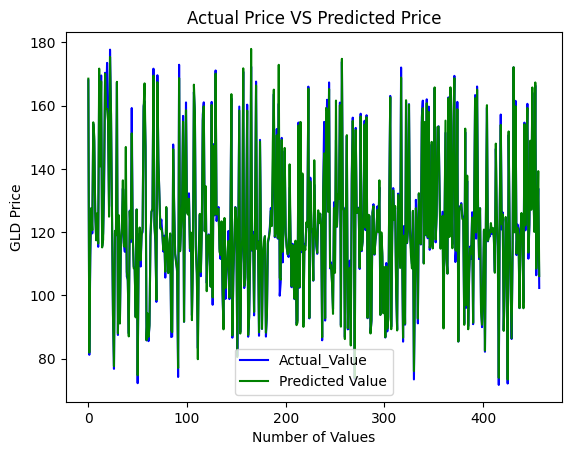

In [80]:
Y_test = list(Y_test)
plt.plot(Y_test, color = 'blue', label = "Actual_Value")
plt.plot(test_prediction, color = 'green', label = 'Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()